# Recommendations for Calibration Snow Gauges

Objective is to find a relationship between the density with respect to gain to determine how best to calibrate the gauge. 

Data Objective: I have tried to observe how well simple models like linear and log-linear regression model can be used to model the data. Various visualizations have been performed to illustrate the performance

### Brief Background
In order to monitor the water supply from yearly snowfall, the United States Department of Agriculture (USDA) uses a gamma transmission snow gauge. These gauges are placed in areas of interest, including the Sierra Nevada Mountains, which supplies water to Northern California. The gauge determines the depth of the snowfall to provide an estimation of the volume of snow as a proxy for the amount of water that will be available for the upcoming year. In addition to the volume of snow, gamma rays are used to approximate density.

In order to monitor the water supply from yearly snowfall, the United States Department of Agriculture (USDA) uses a gamma transmission snow gauge. These gauges are placed in areas of interest, including the Sierra Nevada Mountains, which supplies water to Northern California. The gauge determines the depth of the snowfall to provide an estimation of the volume of snow as a proxy for the amount of water that will be available for the upcoming year. In addition to the volume of snow, gamma rays are used to approximate density. In such gauges gamma ray emissions are sent to penetrate the snow and converted to a density measurement once a return signal is received. However, as the gauge ages, calibration is required to maintain a level of accuracy in gamma ray readings.

### Data
This data is provided by the USDA during one of their calibration sessions in the Sierra Nevada. For our gauge model, different blocks of polyethylene with known densities are placed between the emitting rod and the receiver rod for the gauge. As gamma rays pass through the polyethylene blocks, the gamma ray may be absorbed, bounce away from the receiver rod, or pass through the block to the receiver rod. For each block, 30 measurements are taken, and the middle 10 are reported in the dataset; the measurement from the gauge is called ”gain.” There were 9 blocks in total.

### Post Analysis Conclusion

Here our objective was to identify a relationship between the density and gain of the snow gauge. In our analysis we identified that there is a linear relationship between log(Gain) and the density of the snow. Here the explanatory variable was gain and the response variable is density. (Although, during training, we measured gain for a corresponding density, the nature of the variables during applications get inverted). 

We first found the mean value of gain for each density. Then we first tested linear regression model on density v/s gain. The nonlinear relationship between gain and density led to incorrect fitting and high error. Hence we applied linear regression to the density vs log(Gain) plots. We then performed regression analysis on this fit to see if it satisfies all the conditions. 

We observed that for the density v/s log(Gain) plots had R^2 coefficient ~ 1. Then, We also found F-test p-value to be close to 0. Both these values imply the linear model was a good fit for the plot. We further analyze the effect on all residuals. For this analysis we do not equate the means. We take all 90 points into consideration. The residual distribution was plotted. The **QQ plots** and the **kurtosis** show that the distribution is close to normal but not normal. Hence we verify that the plots are nearly normal. We also found the mean and variance of the residuals and by visual inspection we see that the **residuals are homoscedastic** in nature surrounded around ~0 mean. Box Plot also illustrates this feature. We found the root mean square error and the absolute error of the fit.

Hence we see that linear model works well for approximation.

**Our aim was not to fit best model but to evaluate the performance of linear regression model (with and without log transformation) and see what all tests we can perform to visualize the performance**

In [1]:
rm(list=ls())

# Loading dataset
gauge <- read.csv("gauge.txt", sep="")
head(gauge)
density <- gauge$density
gain <- gauge$gain

# 9 Unique values of density for which observations have been recorded
obs.density <- unique(gauge$density)
# gain observations for each unique density stored as a row vector
obs.gain <- matrix(nrow = length(obs.density),ncol = nrow(gauge)/length(obs.density))
for (i in 1:length(obs.density)){
  obs.gain[i,] <- gauge$gain[which(gauge$density==unique(gauge$density)[i])]
}
# summary statistics for gain observations of each unique density
obs.mean <- numeric(length(obs.density))
obs.sd <- numeric(length(obs.density))
for (i in 1:length(obs.density)){
  obs.mean[i] <- mean(obs.gain[i,])
  obs.sd[i] <- sd(obs.gain[i,])
}
print(matrix(c(obs.density,obs.mean,obs.sd),nrow = 9,ncol=3,dimnames = list(1:9,c("Density","Mean(gain)"," Std.dev(gain)"))))


,density,gain
1,0.686,17.6
2,0.686,17.3
3,0.686,16.9
4,0.686,16.2
5,0.686,17.1
6,0.686,18.5


  Density Mean(gain)  Std.dev(gain)
1   0.686      17.51      0.8438668
2   0.604      26.93      1.9287590
3   0.508      38.55      1.1501208
4   0.412      56.82      2.4096104
5   0.318      88.49      2.5026430
6   0.223     130.60      2.3664319
7   0.148     201.40      2.9514591
8   0.080     296.10      3.7844712
9   0.001     426.70      4.2700507


'data.frame':	90 obs. of  2 variables:
 $ density: num  0.686 0.686 0.686 0.686 0.686 0.686 0.686 0.686 0.686 0.686 ...
 $ gain   : num  17.6 17.3 16.9 16.2 17.1 18.5 18.7 17.4 18.6 16.8 ...


geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


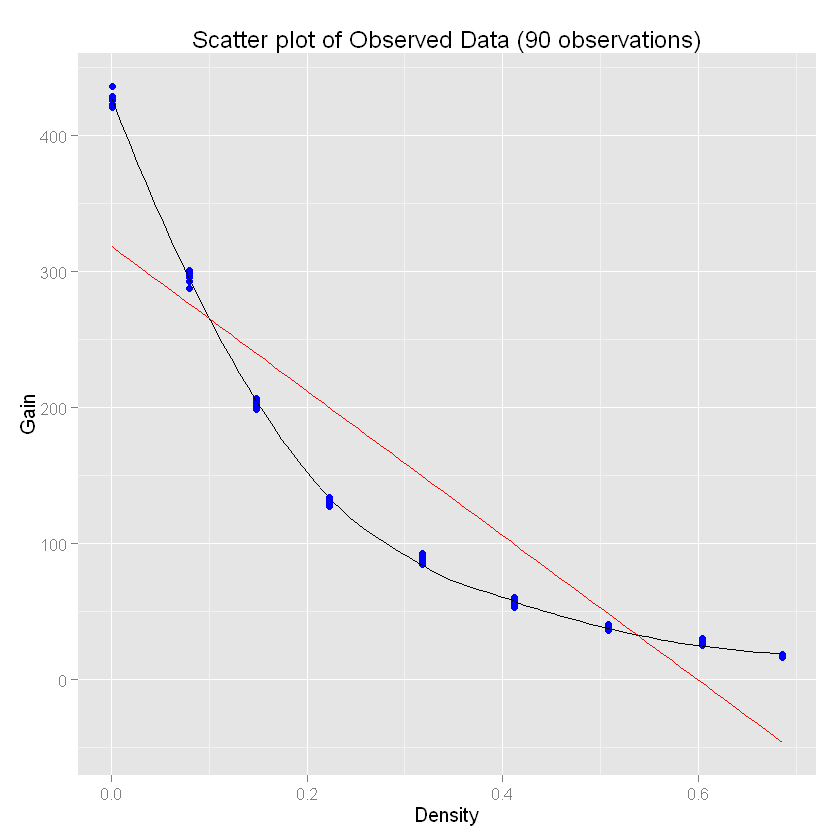

In [2]:
#Part 2
str(gauge)
library(ggplot2)

ggplot(gauge,aes(x = density, y=gain))+geom_point(col="blue",size=2)+labs(y="Gain",x="Density",title="Scatter plot of Observed Data (90 observations)")+geom_smooth(mapping = aes(x = density, y=(gain)),col='black',se=FALSE)+geom_smooth(method = "lm", se = FALSE,col='red')

Here by observing the graph we conclude that the relationship between density and gain is non-linear. We will use a log transformation to make the relationship linear

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


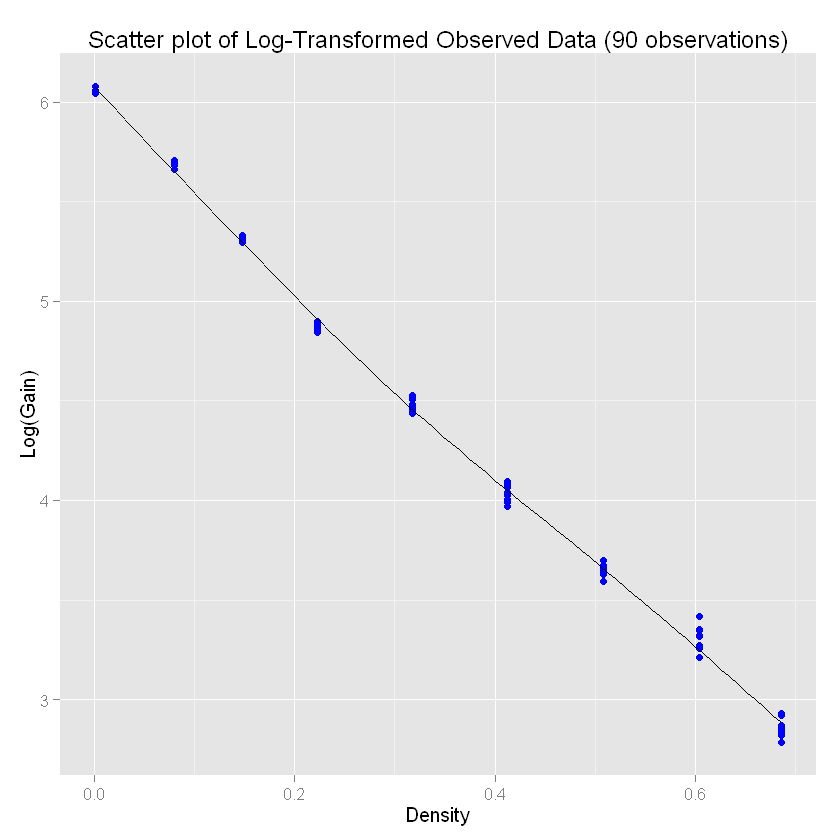

In [4]:
# Part 3
ggplot(gauge,aes(x = density, y=log(gain)))+geom_point(col="blue",size=2)+labs(y="Log(Gain)",x="Density",title="Scatter plot of Log-Transformed Observed Data (90 observations)")+geom_smooth(mapping = aes(x = density, y=log(gain)),col='black',se= FALSE)


We observe that log(Gain) is negatively correlated with density . 

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


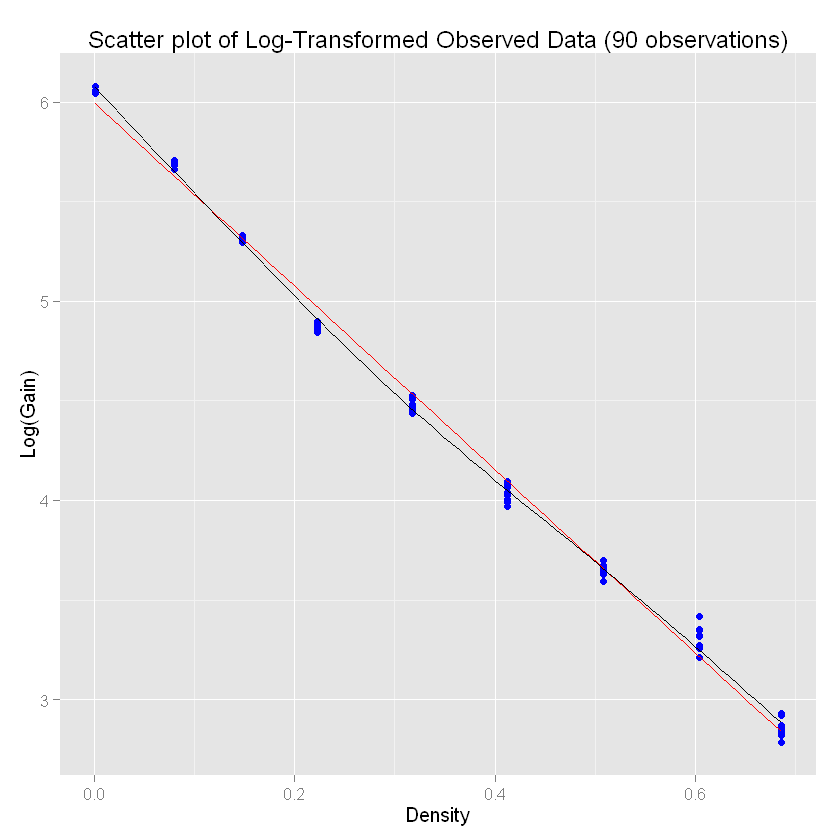

In [6]:
# Part 4
ggplot(gauge,aes(x = density, y=log(gain)))+geom_point(col="blue",size=2)+labs(y="Log(Gain)",x="Density",title="Scatter plot of Log-Transformed Observed Data (90 observations)")+geom_smooth(method = "lm", se = FALSE,col='red')+geom_smooth(mapping = aes(x = density, y=log(gain)),col='black',se= FALSE)

Here we see that the linear regression has worked well in approximating the data. We can use ellipse plots to graphically examine correlation in simple linear fitting. During linear regression, the two variables, X and Y are assumed to follow the bivariate normal distribution. The function plotcorr() plots a correlation matrix using ellipse­shaped glyphs for each entry. The ellipse represents a level curve of the density of a bivariate normal with the matching correlation.

package 'ellipse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Saurabh\AppData\Local\Temp\Rtmpmgq4Zr\downloaded_packages


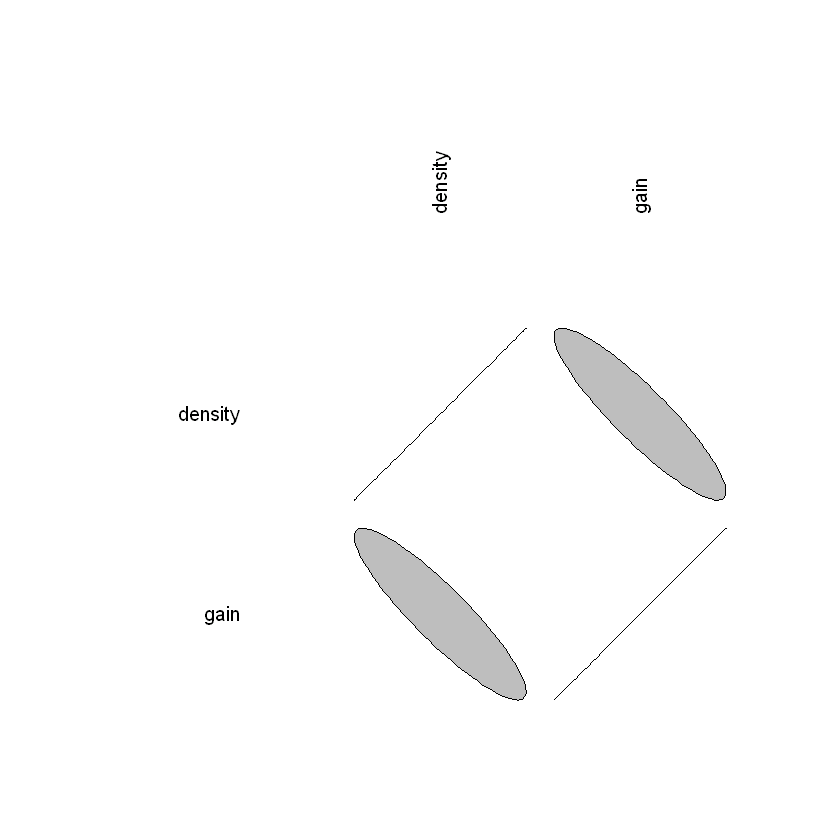

In [16]:
fit.log <- lm(density~I(log(gain)) )
fit.linear <- lm( density~I(gain) )
#install.packages("ellipse",repos='http://cran.us.r-project.org')
library(ellipse)
plotcorr(cor(gauge))

In [8]:
print("The correlation matrix of the given data is: ")
cor(gauge)

[1] "The correlation matrix of the given data is: "


,density,gain
density,1.0000000,-0.9031597
gain,-0.9031597,1.0000000


In [11]:
# F-value and R-square
summary(fit.linear)
summary(fit.log)


Call:
lm(formula = density ~ I(gain))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.13198 -0.09452 -0.01354  0.09682  0.16495 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.5497239  0.0151243   36.35   <2e-16 ***
I(gain)     -0.0015334  0.0000777  -19.73   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09769 on 88 degrees of freedom
Multiple R-squared:  0.8157,	Adjusted R-squared:  0.8136 
F-statistic: 389.5 on 1 and 88 DF,  p-value: < 2.2e-16



Call:
lm(formula = density ~ I(log(gain)))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.028031 -0.011079 -0.000018  0.011595  0.044911 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.298013   0.006857   189.3   <2e-16 ***
I(log(gain)) -0.216203   0.001494  -144.8   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01471 on 88 degrees of freedom
Multiple R-squared:  0.9958,	Adjusted R-squared:  0.9958 
F-statistic: 2.096e+04 on 1 and 88 DF,  p-value: < 2.2e-16


We perform a summary of the fit() function for linear fit and log fit. The summary not only tells information about the slope intercept coefficients and standard errors, it also performs the **student 't' test** and the **Fischer test** to test for significance of the line.

The definition of **R-squared** is fairly straight forward; it is the percentage of the response variable variation that is explained by a linear model.

**R-squared = Explained variation / Total variation**

**P-value:** the P value for the F-test of overall significance test is less than your significance level, you can reject the null hypothesis and conclude that your model provides a better fit than the intercept only model.In this case, the p-value is very low (~0), it's suggesting that it would be rare to get a result as unusual. Hence our hypothesis to assume that linear regression is a good model is acceptable.

,2.5 %,97.5 %
(Intercept),1.284386,1.311639
I(log(gain)),-0.2191712,-0.2132352


geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


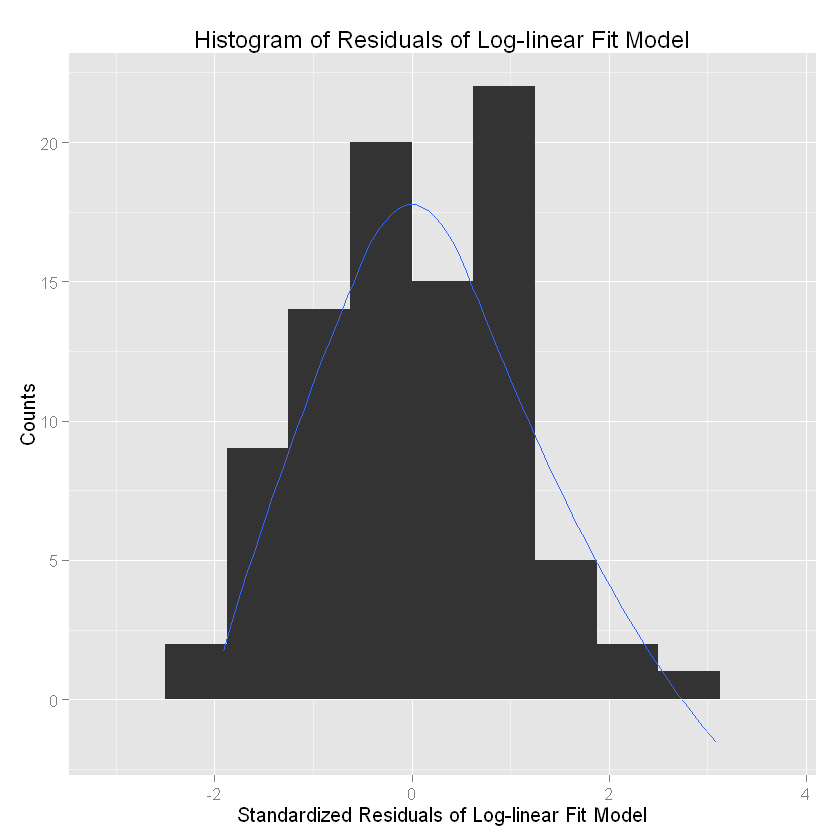

In [12]:
# Part 8

# Adjusted R-squared ~ 1 => Good model
# confidence interval for the coefficients
confint(fit.log,level=0.95)


# Part 9

res.linear <- as.numeric(residuals(fit.linear))
res.log <- as.numeric(residuals(fit.log))

# To check if residuals are nearly normal
a<-fortify(fit.linear)
sres.linear <- as.numeric(a$.stdresid)


b<-fortify(fit.log)
sres.log <- as.numeric(b$.stdresid)
ggplot(b, aes(sres.log))+geom_histogram(binwidth = diff(range(sres.log))/8)+labs(x="Standardized Residuals of Log-linear Fit Model",y="Counts",title="Histogram of Residuals of Log-linear Fit Model")+geom_smooth(aes(y=45*dnorm(sres.log,mean=mean(sres.log),sd=sd(sres.log))),se = FALSE)



Histogram shows that the residuals are nearly normal but not normal

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


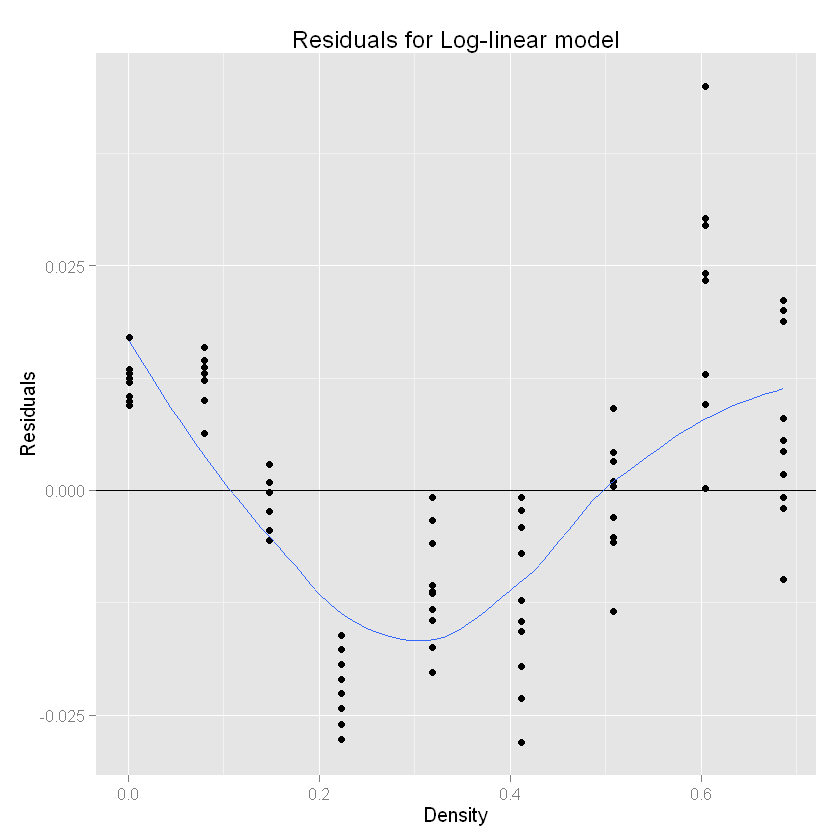

ERROR: Error in eval(expr, envir, enclos): object 'x' not found


ERROR: Error in eval(expr, envir, enclos): object 'x' not found


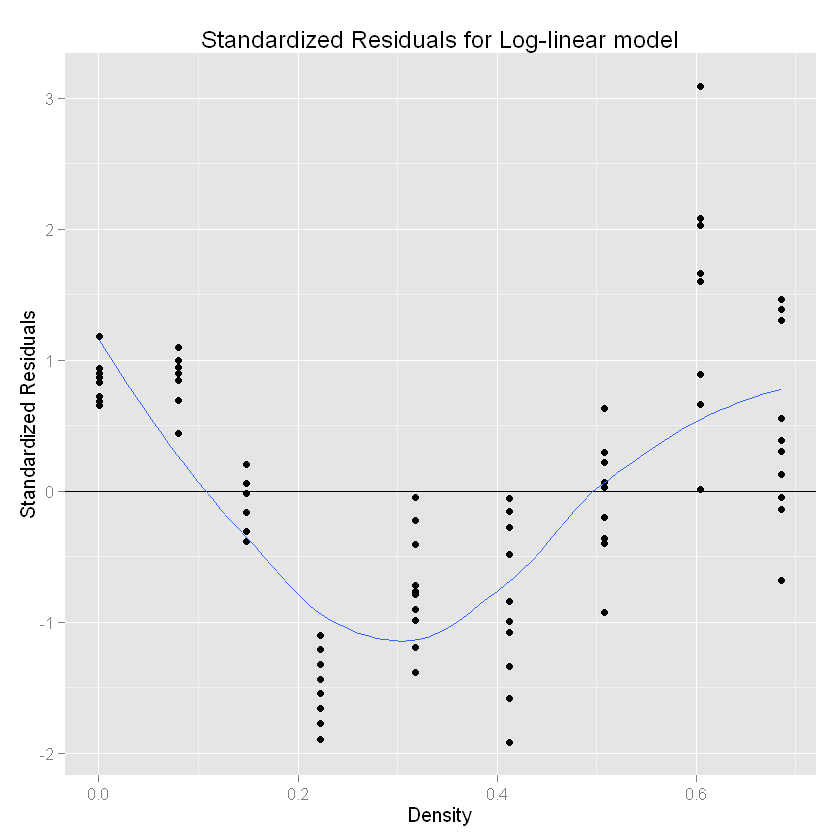

In [13]:
ggplot(fit.log, aes(density, .resid)) +geom_point() +  geom_hline(yintercept = 0) +  geom_smooth(se = FALSE)+labs(x="Density",y="Residuals",title="Residuals for Log-linear model")

ggplot(fit.log, aes(density, .stdresid)) +geom_point() +  geom_hline(yintercept = 0) +  geom_smooth(se = FALSE)+labs(x="Density",y="Standardized Residuals",title="Standardized Residuals for Log-linear model")

qqplot <- function(y,distribution=qnorm,t) {
  require(ggplot2)
  x <- distribution(ppoints(y))
  d <- data.frame(Theoretical_Quantiles=x, Sample_Quantiles=sort(y))
  p <- ggplot(d, aes(x=Theoretical_Quantiles, y=Sample_Quantiles)) +geom_point() + geom_line(aes(x=x, y=x)) +labs(title=t)
  return(p)
}

qqplot(sres.linear,t="Q-Q plot for residuals of Linear Fit")
qqplot(sres.log,t="Q-Q plot for residuals of Log-linear Fit")

In [18]:
#install.packages("moments",repos='http://cran.us.r-project.org')
library(moments)
kurt_res = kurtosis(res.log)
cat("The kurtosis of the distribution of residuals is: ",kurt_res)

The kurtosis of the distribution of residuals is:  2.876687

#### Kurtosis
The kurtosis will also be close to 3 but not equal to three. This confirms the nearly normal tendency of the residuals

#### Homoscedasticity
We check for homoscedasticity. We first plot a boxplot of the residuals. We expect the residuals to have the following properties:
- Mean should be zero
- The distribution of residuals should be equal on either ends of the mean

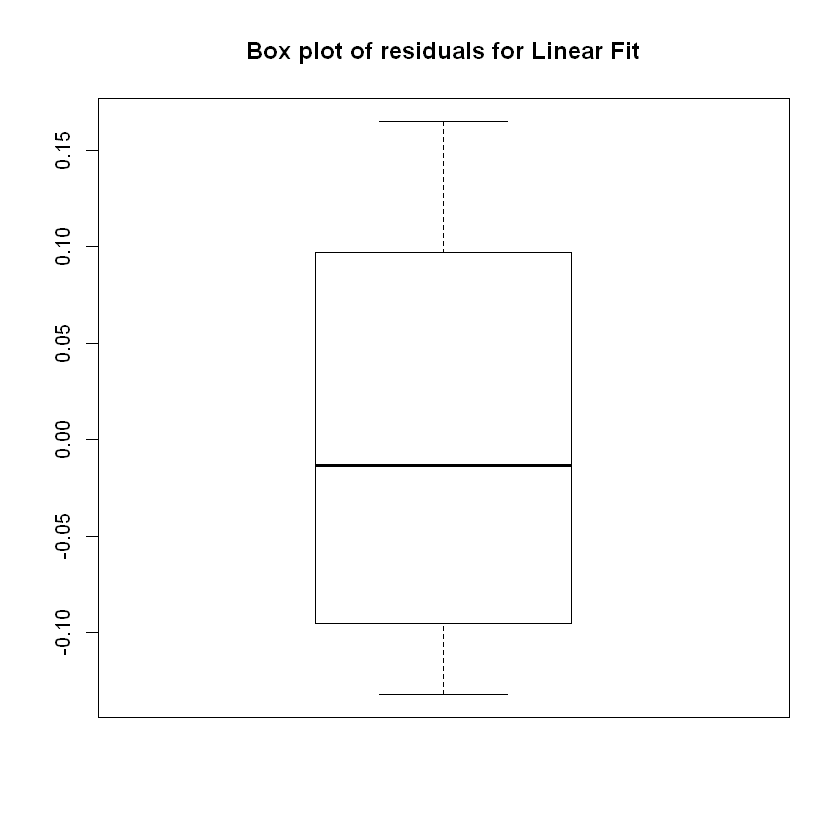

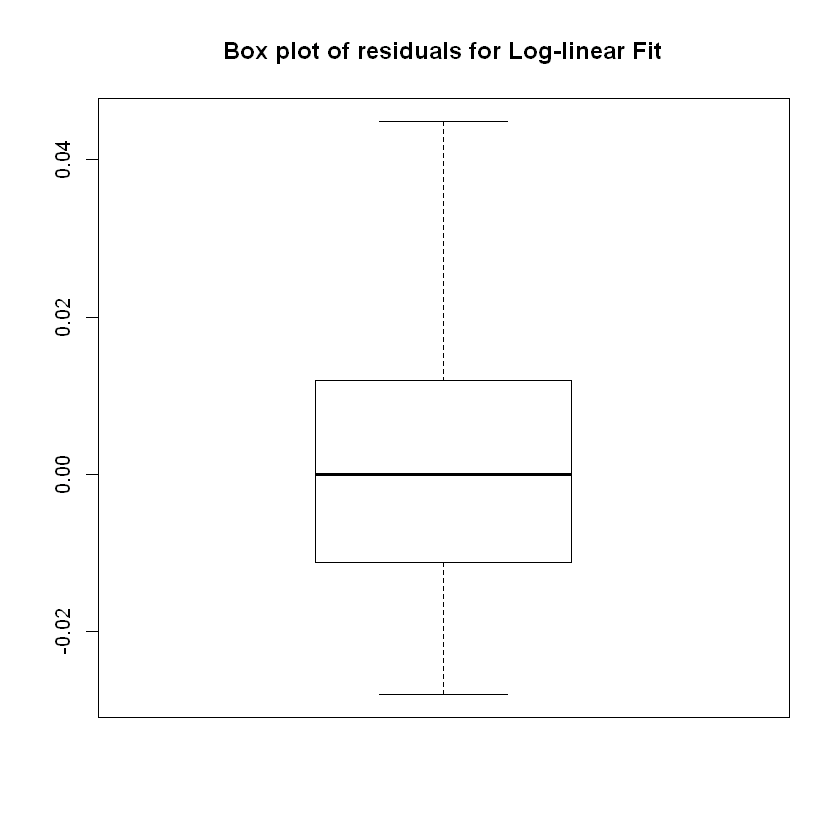

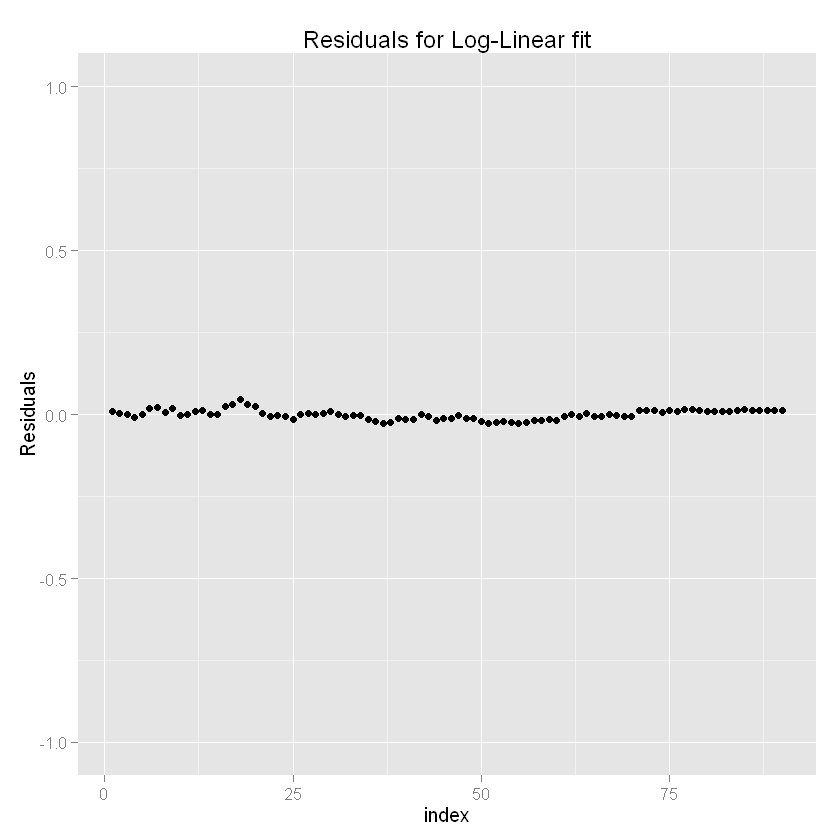

In [19]:
boxplot(res.linear,main="Box plot of residuals for Linear Fit")
boxplot(res.log,main="Box plot of residuals for Log-linear Fit")
ggplot(b,aes(x=1:90,y=.resid))+geom_point()+labs(title="Residuals for Log-Linear fit",x="index",y="Residuals")+ylim(c(-1,1))

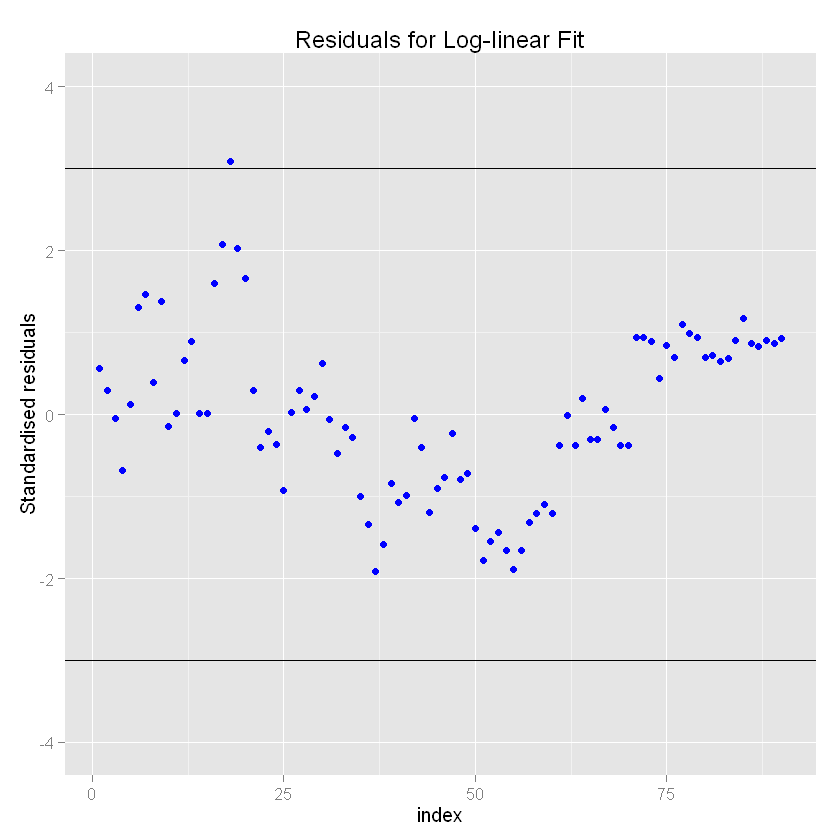

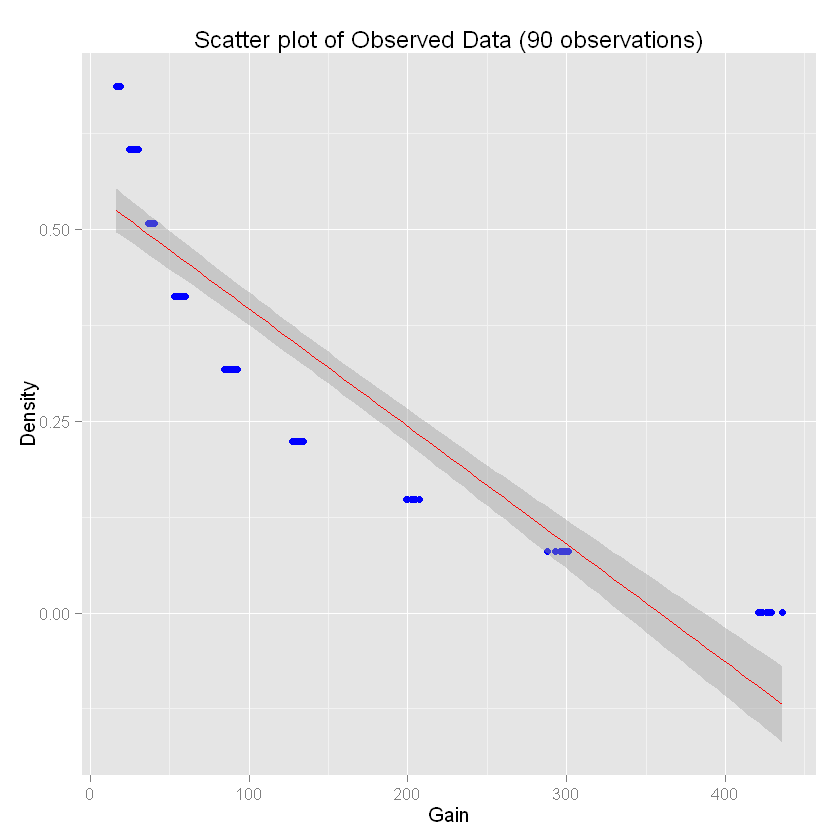

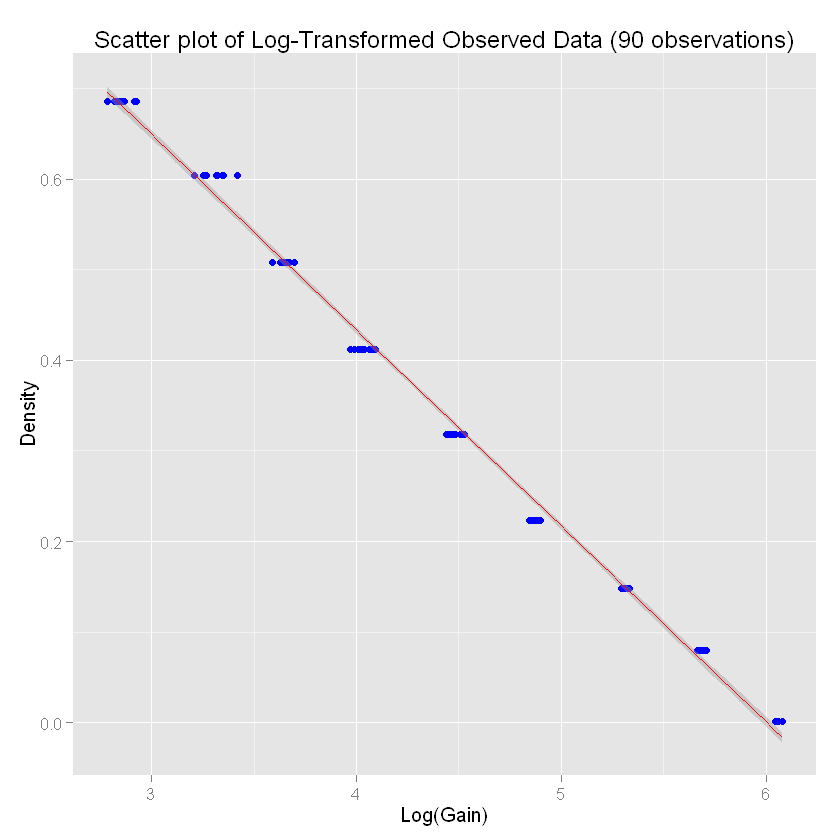

In [20]:
ggplot(b,aes(x=1:90,y=.stdresid))+geom_point(col='blue')+ylim(c(-4,4))+geom_hline(yintercept = 3)+geom_hline(yintercept = -3)+labs(title="Residuals for Log-linear Fit",y="Standardised residuals",x="index")

ggplot(gauge,aes(y = density, x=gain))+geom_point(col="blue",size=2)+labs(x="Gain",y="Density",title="Scatter plot of Observed Data (90 observations)")+stat_smooth(method = "lm", se = TRUE,col='red',level=0.95)
ggplot(gauge,aes(y = density, x=log(gain)))+geom_point(col="blue",size=2)+labs(x="Log(Gain)",y="Density",title="Scatter plot of Log-Transformed Observed Data (90 observations)")+stat_smooth(method = "lm", se = TRUE,col='red',level=0.95)

mean_res = mean(res.log)
var_res = var(res.log)
range_res = c(min(res.log), max(res.log))


In [21]:
# Mean Square Error
rmse <- function(error){
  return(sqrt(mean(error^2)))
}
# RMSE for linear model
RMSE.linear <- rmse(res.log)
cat("The RMS error of the regression fit is: ",RMSE.linear)
    
abs_res_error = sum(abs(res.log))

The RMS error of the regression fit is:  0.01455053

In [24]:
#install.packages("plotrix",repos='http://cran.us.r-project.org')
require(plotrix)


fit_lm<-function(d,t){d.train<-unique(d$density)
g.train <- numeric(length(d.train))
for (i in 1:length(d.train)){
  g.train[i]<-mean(d$gain[which(d$density==d.train[i])])
}
model_x <- g.train
fit.model<-lm(d.train~log(model_x))
pred.density <- predict(fit.model, data.frame(model_x<-t))
r <- list("model"=fit.model,"prediction"=pred.density)
return (r)
}


In [25]:
data.train1 <- gauge[which(density!=0.508),]
data.train1 <- cbind.data.frame(data.train1,"id"=rep(x = 1,nrow(data.train1)))
test.data1 <- gain[density==0.508]

data.train2 <- gauge[which(density!=0.001),]
data.train2 <- cbind.data.frame(data.train2,"id"=rep(x = 1,nrow(data.train2)))
test.data2 <- gain[density==0.001]

ret1<-fit_lm(data.train1,test.data1)
ret2<-fit_lm(data.train2,test.data2)


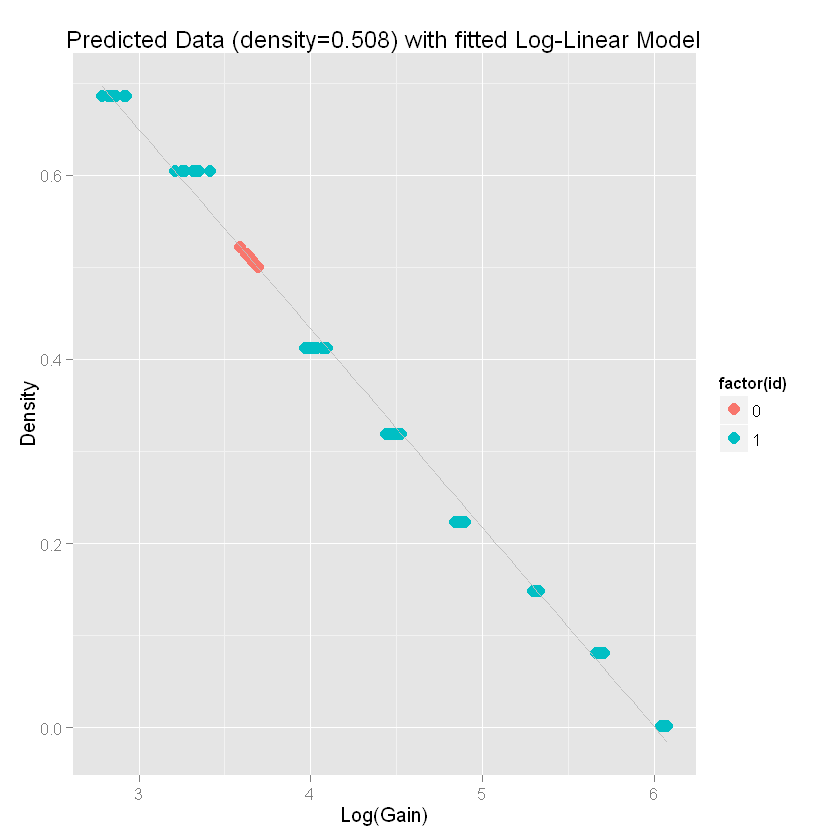

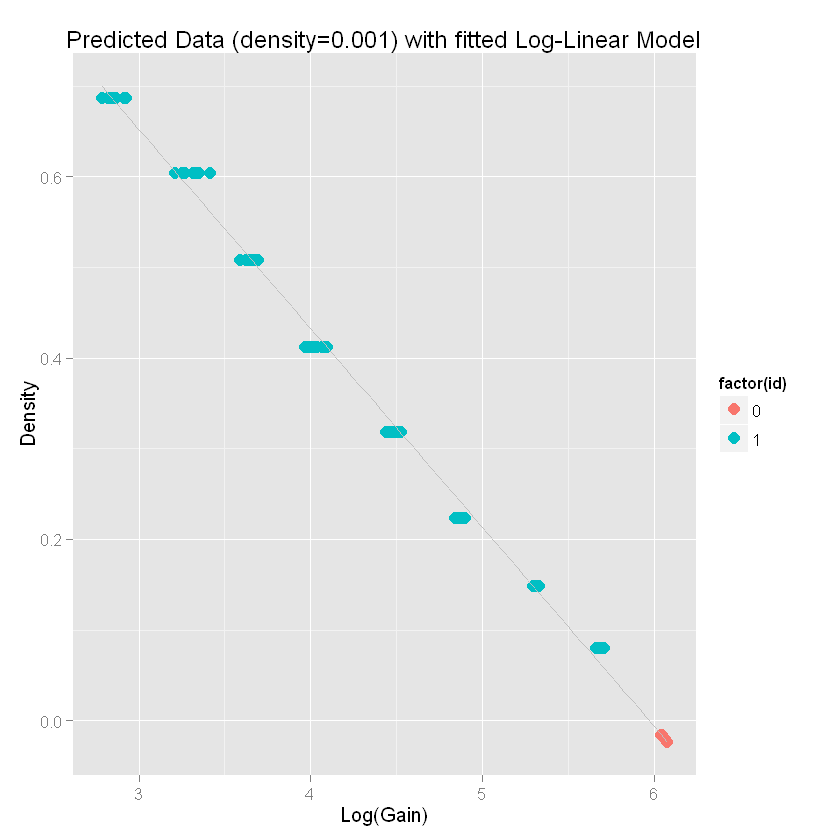

In [26]:
model1 <- ret1$model
density.prediction1 <- ret1$prediction
df_temp <- cbind.data.frame("density"=density.prediction1,"gain"=test.data1,"id"=rep(x=0,length(test.data1)))
df1<- rbind.data.frame(data.train1,df_temp)

model2 <- ret2$model
density.prediction2 <- ret2$prediction
df_temp <- cbind.data.frame("density"=density.prediction2,"gain"=test.data2,"id"=rep(x=0,length(test.data2)))
df2<- rbind.data.frame(data.train2,df_temp)

ggplot(df1,aes(y = density, x=log(gain),col=factor(id)))+geom_point(size=3.5)+labs(x="Log(Gain)",y="Density",title="Predicted Data (density=0.508) with fitted Log-Linear Model")+geom_smooth(method = "lm", se = FALSE,col='gray')
ggplot(df2,aes(y = density, x=log(gain),col=factor(id)))+geom_point(size=3.5)+labs(x="Log(Gain)",y="Density",title="Predicted Data (density=0.001) with fitted Log-Linear Model")+geom_smooth(method = "lm", se = FALSE,col='gray')

In [27]:

pred.density.CI1 <- predict(model1, data.frame(x.model=test.data1), interval="confidence")
pred.density.CI2 <- predict(model2, data.frame(x.model=test.data2), interval="confidence")

lbd1 <- pred.density.CI1[,2]
ubd1 <- pred.density.CI1[,3]
lbd2 <- pred.density.CI2[,2]
ubd2 <- pred.density.CI2[,3]

true.density1 = 0.508
true.density2 = 0.001

check1 <- (true.density1 >= lbd1) & (true.density1 <= ubd1)
check2 <- (true.density2 >= lbd2) & (true.density2 <= ubd2)
check1
check2


1    2    3    4    5    6    7    8    9   10 
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

1    2    3    4    5    6    7    8    9   10 
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

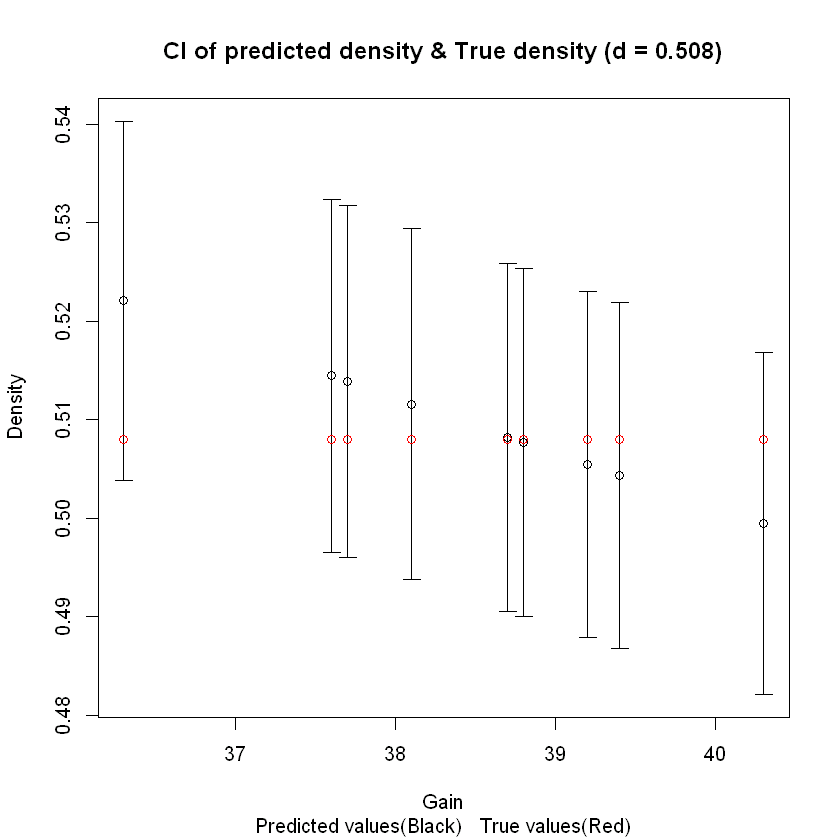

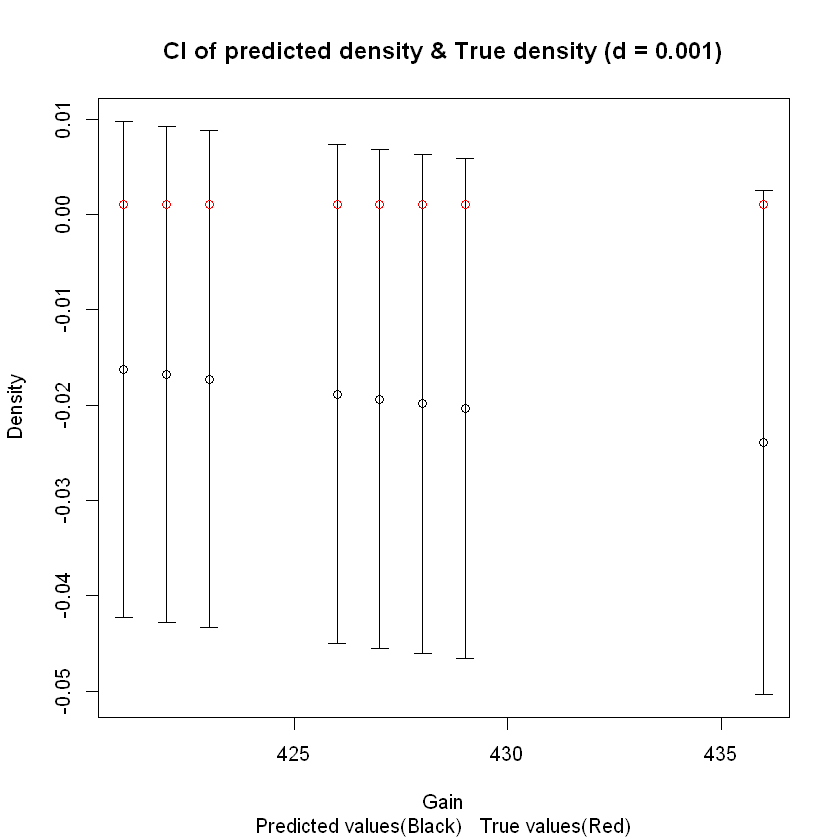

In [28]:

plotCI(test.data1, density.prediction1, ui=ubd1, li=lbd1,main="CI of predicted density & True density (d = 0.508)",sub="Predicted values(Black)   True values(Red)",xlab="Gain",ylab="Density")
points(test.data1, rep(x=true.density1,length(test.data1)), col="red")

plotCI(test.data2, density.prediction2, ui=ubd2, li=lbd2,main="CI of predicted density & True density (d = 0.001)",sub="Predicted values(Black)   True values(Red)",xlab="Gain",ylab="Density")
points(test.data2, rep(x=true.density2,length(test.data2)), col="red")

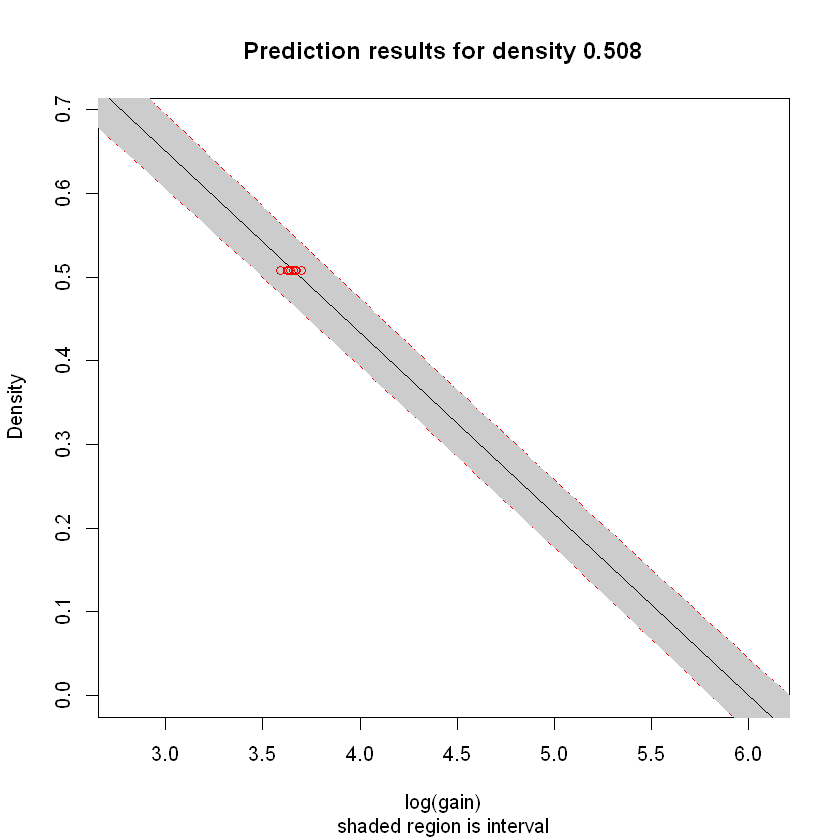

In [29]:
plot(data.train1$density ~ log(data.train1$gain), type = 'n',main="Prediction results for density 0.508",xlab="log(gain)",ylab="Density",sub="shaded region is interval")
x.val <- seq(2.5, 6.5, length.out = 100)
preds1 <- predict(model1,  data.frame(model_x =exp(x.val)),interval = 'prediction')
lines(x.val, preds1[ ,3], lty = 'dashed', col = 'red')
lines(x.val, preds1[ ,2], lty = 'dashed', col = 'red')
polygon(c(rev(x.val), x.val), c(rev(preds1[ ,3]), preds1[ ,2]), col = 'grey80', border = NA)
abline(model1)
points(log(test.data1),rep(x=true.density1,length(test.data1)), col="red")


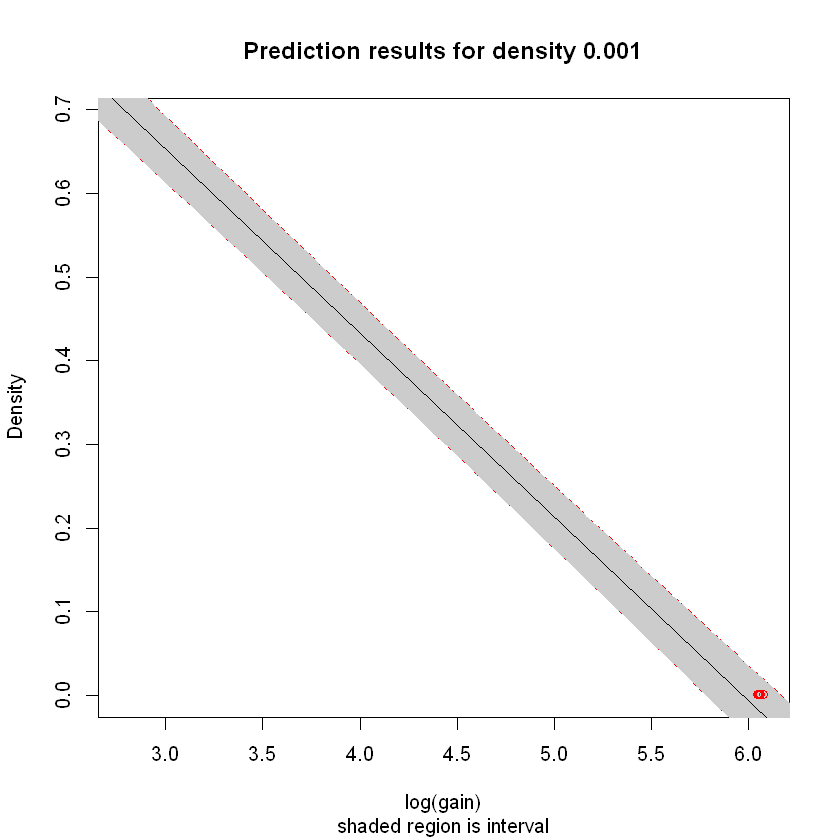

In [30]:

plot(data.train1$density ~ log(data.train1$gain), type = 'n',main="Prediction results for density 0.001",xlab="log(gain)",ylab="Density",sub="shaded region is interval")
preds2 <- predict(model2,  data.frame(model_x =exp(x.val)), interval = 'prediction')
lines(x.val, preds2[ ,3], lty = 'dashed', col = 'red')
lines(x.val, preds2[ ,2], lty = 'dashed', col = 'red')
polygon(c(rev(x.val), x.val), c(rev(preds2[ ,3]), preds2[ ,2]), col = 'grey80', border = NA)
abline(model2)
points(log(test.data2),rep(x=true.density2,length(test.data2)), col="red")

# End of Code
